In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Airbnb dataset
airbnb_data = pd.read_csv('Airbnb_Data.csv')
airbnb_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
# Checking for missing values and anomalies in the data
print(airbnb_data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [4]:
# Filtering out any irrelevant columns or rows that are not needed for the analysis
airbnb_data = airbnb_data.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)

In [5]:
# Converting data types to appropriate formats
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

## Exploratory Data Analysis

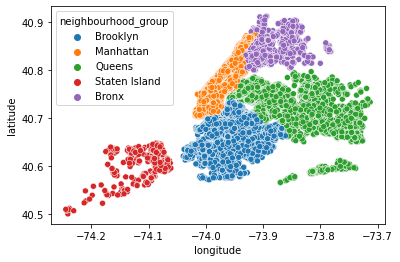

In [6]:
sns.scatterplot(x='longitude', y='latitude', data=airbnb_data, hue='neighbourhood_group')
plt.show()

In [7]:
# Using descriptive statistics and summary metrics to gain a general understanding of the data
print(airbnb_data.describe())

           latitude     longitude         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170    152.720687        7.029962   
std        0.054530      0.046157    240.154170       20.510550   
min       40.499790    -74.244420      0.000000        1.000000   
25%       40.690100    -73.983070     69.000000        1.000000   
50%       40.723070    -73.955680    106.000000        3.000000   
75%       40.763115    -73.936275    175.000000        5.000000   
max       40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       38843.000000                    48895.000000   
mean           23.274466           1.373221                        7.143982   
std            44.550582           1.680442                       32.952519   
min             0.000000           0.010000                        1.000000   
2

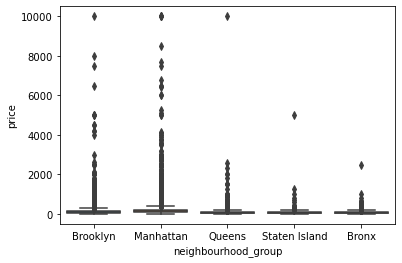

In [8]:
# To identify any patterns or trends in the data
sns.boxplot(x='neighbourhood_group', y='price', data=airbnb_data)
plt.show()

## Data Preprocessing and Cleaning

In [10]:
# To handle missing values by imputing or dropping them as appropriate
airbnb_data = airbnb_data.dropna()

In [11]:
# To correct any errors or inconsistencies in the data
airbnb_data['neighbourhood_group'] = airbnb_data['neighbourhood_group'].replace({'Brookyn': 'Brooklyn'})

In [12]:
# To normalize or standardize the data as appropriate
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
airbnb_data[['latitude', 'longitude']] = scaler.fit_transform(airbnb_data[['latitude', 'longitude']])

In [14]:
# To address any outliers or extreme values in the data
q1 = airbnb_data['price'].quantile(0.25)
q3 = airbnb_data['price'].quantile(0.75)
iqr = q3 - q1
airbnb_data = airbnb_data[(airbnb_data['price'] >= q1 - 1.5*iqr) & (airbnb_data['price'] <= q3 + 1.5*iqr)]

In [15]:
# To create new features or variables that may be useful for the analysis
airbnb_data['availability_ratio'] = airbnb_data['availability_365'] / 365

In [16]:
# To select the most relevant features or variables for the predictive model
X = airbnb_data[['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_ratio']]
y = airbnb_data['price']


In [17]:
# Use feature scaling or selection techniques as appropriate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
# To One-hot encode categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['neighbourhood_group', 'room_type'])], remainder='passthrough')
X = ct.fit_transform(X)

## Data Modelling

In [19]:
# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [20]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Training a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)


In [28]:
# Training a decision tree regression model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_r2 = r2_score(y_test, dt_predictions)


In [29]:
# Training a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)


In [33]:
# Printing the evaluation metrics
print('Linear Regression - Score:', lr_r2)
print('Decision Tree Regression - Score:', dt_r2)
print('Random Forest Regression - Score:', rf_r2)

Linear Regression - Score: 0.48553986830457807
Decision Tree Regression - Score: 0.17035785163013162
Random Forest Regression - Score: 0.5688914501991963


In [31]:
## Data Visualization and Dashboard Creation
import plotly.express as px

In [32]:
# interactive charts and graphs to enable users to explore the data and gain a better understanding of Airbnb rental prices and occupancy rates in New York City
fig = px.scatter(airbnb_data, x='price', y='availability_365', color='neighbourhood_group', hover_data=['room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_ratio'])
fig.show()